In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import sys
sys.path.append('../src')

In [4]:
import anndata
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import seaborn as sns
import torch
import pandas as pd
import pyro
import spaceoracle
from spaceoracle import SpaceOracle
from spaceoracle.tools.utils import clean_up_adata

In [5]:
from spaceoracle.tools.data import LigRecDataset

In [6]:
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score

In [7]:
import scanpy as sc
import squidpy as sq

In [8]:
adata_train = sc.read_h5ad('./.cache/adata_train.h5ad')
adata_train

AnnData object with n_obs × n_vars = 11567 × 5013
    obs: 'cluster', 'rctd_cluster', 'rctd_celltypes'
    uns: 'log1p'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [9]:
from spaceoracle.models.parallel_estimators import SpatialCellularProgramsEstimator

In [10]:
from spaceoracle.models.pixel_attention import CellularNicheNetwork

In [11]:
estimator = SpatialCellularProgramsEstimator(
    adata=adata_train,
    target_gene='Bmpr1a',
)

In [105]:
estimator.adata.uns['ligand_regulator'][[i for i in estimator.modulators if 'Bmp2#' in i]]


Bmp2#Afp    Bmp2#Brca1    Bmp2#Cebpa    Bmp2#Cebpb  \
AAAAAACGGTAGAT  3.495624e-09  1.217533e-08  3.480252e-09  1.006372e-08   
AAAAAATCCGGCGA  1.240247e-13  4.391847e-13  3.553626e-14  1.598969e-13   
AAAAACCGTCAGAC  6.748676e-10  5.265289e-09  0.000000e+00  7.509119e-09   
AAAAACGCTCCGAC  9.809214e-10  3.594533e-09  7.970893e-10  4.501087e-09   
AAAAAGCACGTGTT  9.338563e-09  1.589609e-08  2.332554e-09  2.044006e-08   
...                      ...           ...           ...           ...   
TTTTTTCGCGGCTA  4.816948e-09  1.464505e-08  4.242031e-09  1.627856e-08   
TTTTTTGGGCTGGT  5.011164e-14  1.845873e-13  0.000000e+00  6.460564e-14   
TTTTTTGTACCCAC  5.463438e-10  1.615489e-09  1.619962e-10  9.195147e-10   
TTTTTTGTACGATT  2.101366e-11  8.668795e-11  9.212200e-12  7.918312e-11   
TTTTTTTTGCTTTA  3.661352e-09  1.387764e-08  2.907038e-09  1.588858e-08   

                   Bmp2#E2f7     Bmp2#Ebf1      Bmp2#Fos     Bmp2#Klf7  \
AAAAAACGGTAGAT  3.788535e-09  3.303070e-08  3.139874e-09  2.828705e-08   
AAAAAATCCGGCGA  9.916000e-14  2.646232e-13  7.534821e-14  7.598393e-13   
AAAAACCGTCAGAC  2.826803e-09  5.650590e-08  2.075963e-09  1.208331e-08   
AAAAACGCTCCGAC  1.918887e-09  3.640182e-08  8.490101e-10  1.204888e-08   
AAAAAGCACGTGTT  7.537344e-09  1.032954e-07  5.535316e-09  4.319911e-08   
...                      ...           ...           ...           ...   
TTTTTTCGCGGCTA  2.813928e-09  6.260634e-08  3.793263e-09  2.501514e-08   
TTTTTTGGGCTGGT  1.111951e-14  7.560403e-14  3.044411e-14  2.188808e-13   
TTTTTTGTACCCAC  2.462242e-10  1.127749e-09  3.319180e-10  2.488310e-09   
TTTTTTGTACGATT  2.570190e-11  2.948626e-10  1.887510e-11  1.079550e-10   
TTTTTTTTGCTTTA  3.901942e-09  1.326971e-07  5.259940e-09  5.313449e-08   

                   Bmp2#Mafb    Bmp2#Runx2     Bmp2#Rxra     Bmp2#Tcf4  
AAAAAACGGTAGAT  1.348420e-08  4.177031e-09  5.042093e-08  3.653518e-08  
AAAAAATCCGGCGA  1.766978e-13  1.311577e-13  8.253585e-13  4.012042e-13  
AAAAACCGTCAGAC  4.704610e-09  1.524112e-09  1.359868e-08  4.004803e-08  
AAAAACGCTCCGAC  5.795380e-09  1.612889e-09  9.716169e-09  2.988577e-08  
AAAAAGCACGTGTT  1.764652e-08  4.306250e-09  3.976215e-08  8.005723e-08  
...                      ...           ...           ...           ...  
TTTTTTCGCGGCTA  2.018552e-08  6.866431e-09  3.736390e-08  6.621605e-08  
TTTTTTGGGCTGGT  8.880852e-14  5.299368e-14  3.907582e-13  1.982393e-13  
TTTTTTGTACCCAC  9.682378e-10  9.648506e-10  4.437826e-09  2.097785e-09  
TTTTTTGTACGATT  6.392609e-11  3.285565e-11  2.252088e-10  2.286298e-10  
TTTTTTTTGCTTTA  2.871270e-08  9.155910e-09  2.973678e-08  1.101406e-07  

[11567 rows x 12 columns]

In [101]:
%%time

# estimator.fit(num_epochs=30, threshold_lambda=3e3, learning_rate=1e-3)
estimator.fit(num_epochs=5, threshold_lambda=3e3, learning_rate=1e-3)

0: 0.1227 | 0.1615
1: -0.3212 | 0.2596
2: -2.9174 | 0.2302
3: -0.8699 | 0.9018
4: -17.2740 | 0.7384
5: -3.2855 | 0.9083
6: -0.0055 | 0.9993
CPU times: user 4min 37s, sys: 1min 18s, total: 5min 56s
Wall time: 55 s


In [57]:
estimator.tfl_ligands

['Angptl4',
 'Ebi3',
 'Il21',
 'Il15',
 'Il12b',
 'Cd40',
 'Bmp2',
 'Igf1',
 'Il21',
 'Osm',
 'Il2',
 'Il1a',
 'Vegfa',
 'Il1b',
 'Osm',
 'Il4',
 'Il2',
 'Il15',
 'Csf1',
 'Cxcl12',
 'Il18',
 'Adm',
 'Ly86',
 'Il2',
 'Igf1',
 'Bmp2',
 'Il1b',
 'Lif',
 'Il33',
 'Igf1',
 'Mfap5',
 'Mfng',
 'Ebi3',
 'Il21',
 'Igf1',
 'Vegfa',
 'Ebi3',
 'Il12b',
 'Cklf',
 'Ebi3',
 'Osm',
 'Gas6',
 'Il21',
 'Lif',
 'Vegfa',
 'Osm',
 'Cxcl12',
 'Ebi3',
 'Tnfsf9',
 'Il21',
 'Il15',
 'Retn',
 'Ly86',
 'Il1b',
 'Ebi3',
 'Il21',
 'Clcf1',
 'Il24',
 'Vegfa',
 'Il4',
 'Lif',
 'Il24',
 'Il15',
 'Osm',
 'Angptl4',
 'Il1a',
 'Adm',
 'Ebi3',
 'Il18',
 'Ebi3',
 'Retn',
 'Igf1',
 'Il1b',
 'Tnfsf9',
 'Ebi3',
 'Il21',
 'Angptl4',
 'Il7',
 'Ebi3',
 'Il21',
 'Il24',
 'Il1b',
 'Lta',
 'Il1a',
 'Il33',
 'Adm',
 'Bmp2',
 'Tnfsf9',
 'Cxcl12',
 'Mmrn2',
 'Ebi3',
 'Osm',
 'Il7',
 'Il4',
 'Ebi3',
 'Il21',
 'Kitl',
 'Vegfa',
 'Sema7a',
 'Mcam',
 'Ebi3',
 'Igfbp7',
 'Ebi3',
 'Ly86',
 'Slpi',
 'Mmp15',
 'Igf1',
 'Csf1',
 'Il1b',
 'Il

In [56]:
estimator.adata.uns['received_ligands_tfl']

Adm   Angptl4          Bmp2      Cd40      Cklf  \
AAAAAACGGTAGAT  6.194041e-07  0.000009  1.453307e-06  0.000040  0.000038   
AAAAAATCCGGCGA  1.020516e-07  0.000007  3.487532e-11  0.000021  0.000031   
AAAAACCGTCAGAC  9.818820e-08  0.000011  9.608707e-07  0.000072  0.000062   
AAAAACGCTCCGAC  4.388075e-08  0.000010  6.522570e-07  0.000060  0.000055   
AAAAAGCACGTGTT  9.914356e-07  0.000015  2.562051e-06  0.000072  0.000069   
...                      ...       ...           ...       ...       ...   
TTTTTTCGCGGCTA  6.051116e-07  0.000011  1.755732e-06  0.000046  0.000053   
TTTTTTGGGCTGGT  9.377471e-08  0.000008  1.409122e-11  0.000022  0.000032   
TTTTTTGTACCCAC  6.160864e-08  0.000008  1.536300e-07  0.000036  0.000041   
TTTTTTGTACGATT  1.935292e-08  0.000007  8.736442e-09  0.000026  0.000035   
TTTTTTTTGCTTTA  7.311985e-07  0.000011  2.434591e-06  0.000051  0.000049   

                   Clcf1          Csf1    Cxcl12      Ebi3      Gas6  ...  \
AAAAAACGGTAGAT  0.000015  4.973717e-06  0.000010  0.000005  0.000003  ...   
AAAAAATCCGGCGA  0.000010  5.203615e-07  0.000008  0.000003  0.000001  ...   
AAAAACCGTCAGAC  0.000027  5.709788e-06  0.000013  0.000008  0.000004  ...   
AAAAACGCTCCGAC  0.000023  4.614956e-06  0.000011  0.000008  0.000003  ...   
AAAAAGCACGTGTT  0.000028  8.823532e-06  0.000016  0.000010  0.000005  ...   
...                  ...           ...       ...       ...       ...  ...   
TTTTTTCGCGGCTA  0.000018  5.354450e-06  0.000011  0.000007  0.000004  ...   
TTTTTTGGGCTGGT  0.000010  8.102287e-07  0.000009  0.000003  0.000001  ...   
TTTTTTGTACCCAC  0.000013  2.252137e-06  0.000008  0.000006  0.000003  ...   
TTTTTTGTACGATT  0.000011  9.824433e-07  0.000009  0.000005  0.000002  ...   
TTTTTTTTGCTTTA  0.000019  6.525312e-06  0.000012  0.000006  0.000004  ...   

                       Mfap5      Mfng         Mmp15         Mmrn2       Osm  \
AAAAAACGGTAGAT  2.093728e-06  0.000071  1.178166e-07  1.121092e-06  0.000009   
AAAAAATCCGGCGA  5.810976e-08  0.000075  1.162145e-06  4.054307e-08  0.000012   
AAAAACCGTCAGAC  2.633141e-06  0.000104  4.655420e-08  1.277526e-06  0.000013   
AAAAACGCTCCGAC  2.426692e-06  0.000100  1.974773e-08  5.498093e-07  0.000011   
AAAAAGCACGTGTT  3.233570e-06  0.000128  1.416657e-07  1.031068e-06  0.000014   
...                      ...       ...           ...           ...       ...   
TTTTTTCGCGGCTA  2.187020e-06  0.000100  6.883506e-08  1.363591e-06  0.000011   
TTTTTTGGGCTGGT  3.037960e-08  0.000079  9.536239e-07  1.154500e-07  0.000013   
TTTTTTGTACCCAC  1.178487e-06  0.000085  3.529933e-07  6.520577e-07  0.000010   
TTTTTTGTACGATT  6.137057e-07  0.000079  5.591819e-07  1.468129e-07  0.000011   
TTTTTTTTGCTTTA  2.609907e-06  0.000087  7.395068e-08  1.691785e-06  0.000011   

                         Retn    Sema7a          Slpi    Tnfsf9         Vegfa  
AAAAAACGGTAGAT   1.016982e-07  0.000010  1.048982e-05  0.000002  1.848042e-06  
AAAAAATCCGGCGA   1.431999e-78  0.000012  9.931934e-07  0.000001  7.441842e-08  
AAAAACCGTCAGAC   9.347099e-18  0.000010  1.813897e-05  0.000004  3.352126e-06  
AAAAACGCTCCGAC   1.166474e-15  0.000009  1.497209e-05  0.000003  2.462921e-06  
AAAAAGCACGTGTT   2.187494e-95  0.000016  1.767352e-05  0.000004  2.980389e-06  
...                       ...       ...           ...       ...           ...  
TTTTTTCGCGGCTA  2.265871e-123  0.000012  1.190717e-05  0.000003  1.544505e-06  
TTTTTTGGGCTGGT   3.249385e-41  0.000013  8.798211e-07  0.000002  1.605276e-08  
TTTTTTGTACCCAC  4.260970e-116  0.000009  6.188794e-06  0.000002  9.136888e-07  
TTTTTTGTACGATT   7.892553e-24  0.000011  2.083291e-06  0.000002  9.379008e-08  
TTTTTTTTGCTTTA   6.991516e-10  0.000011  1.256688e-05  0.000003  2.519083e-06  

[11567 rows x 38 columns]

In [58]:
df = estimator.betadata

In [22]:
betas = torch.from_numpy(
    df[['beta0']+['beta_'+i for i in estimator.modulators]].values).float()

inputs_x = torch.from_numpy(
    estimator.train_df.drop(
        columns=estimator.target_gene).values).float()

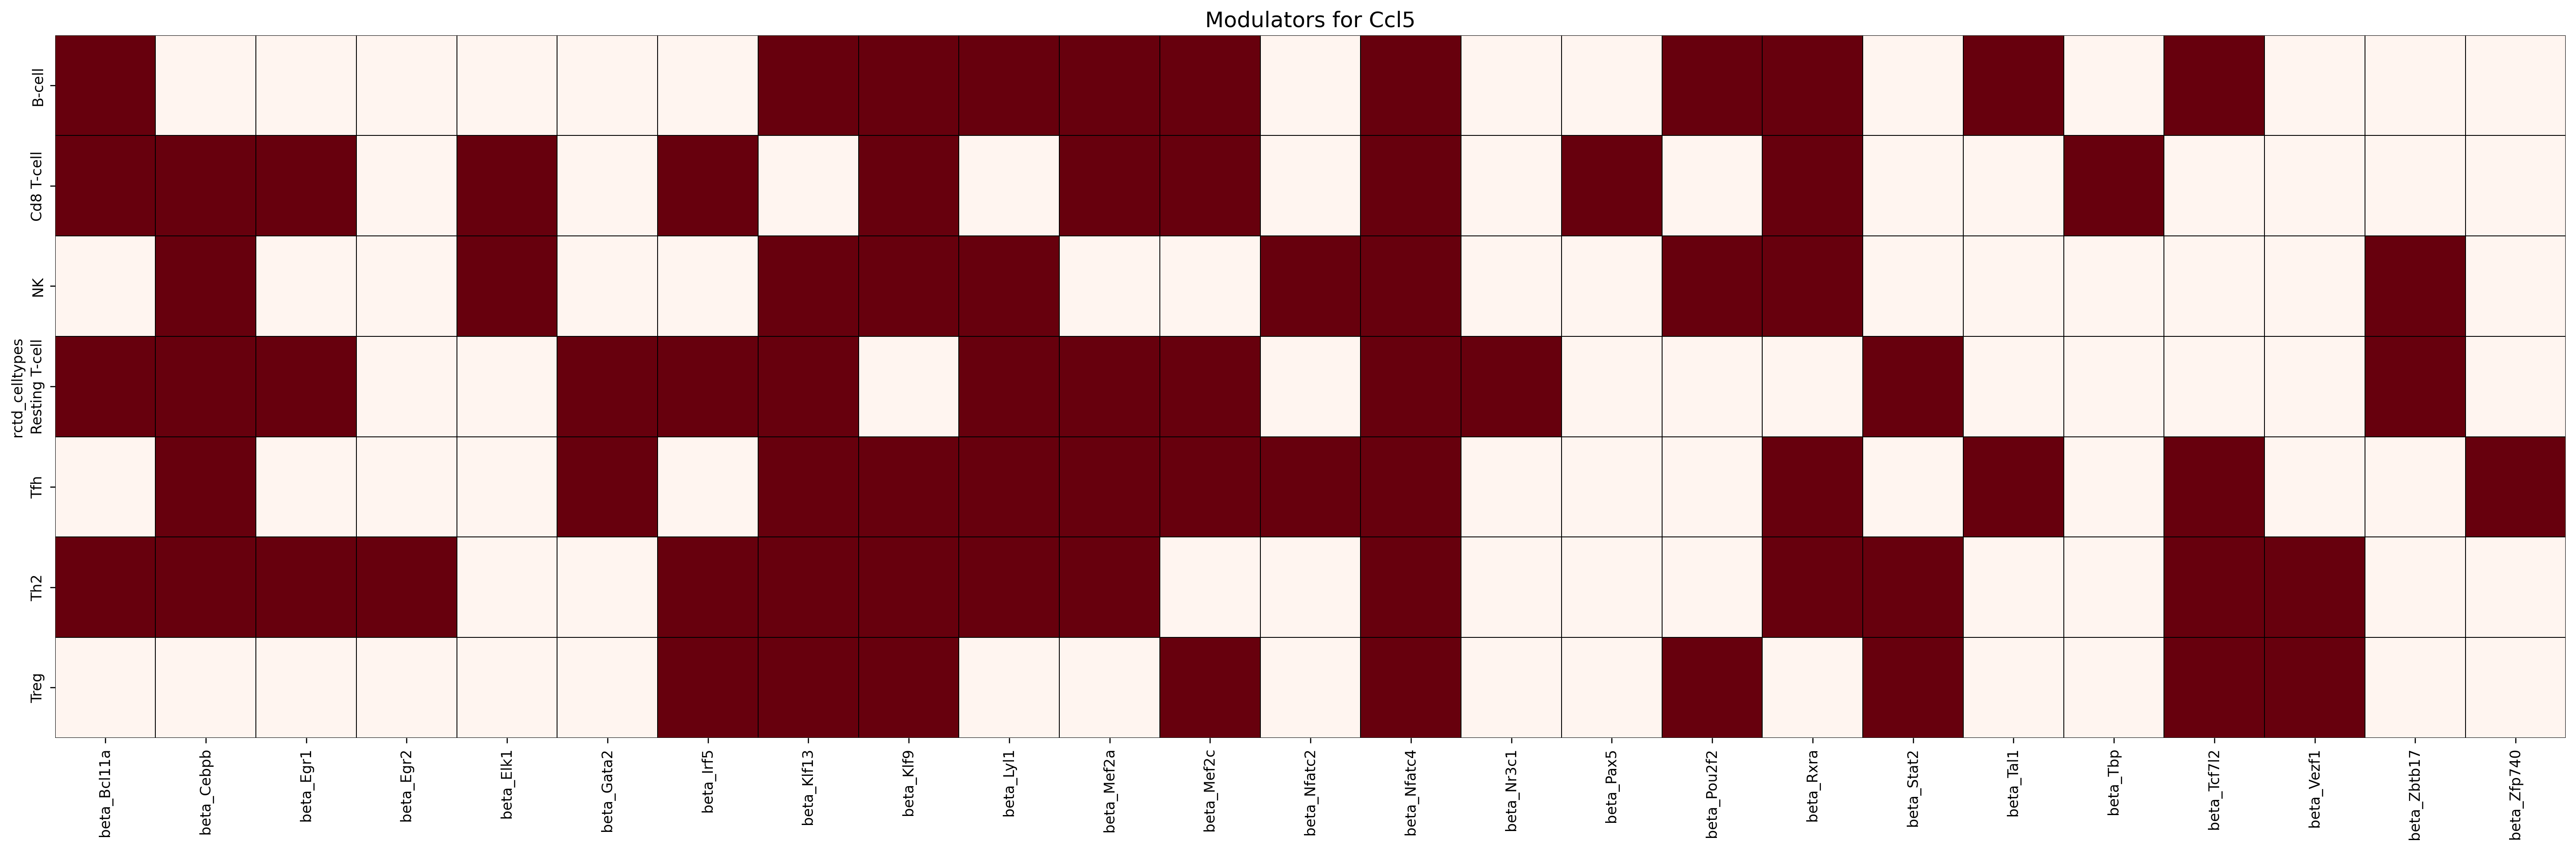

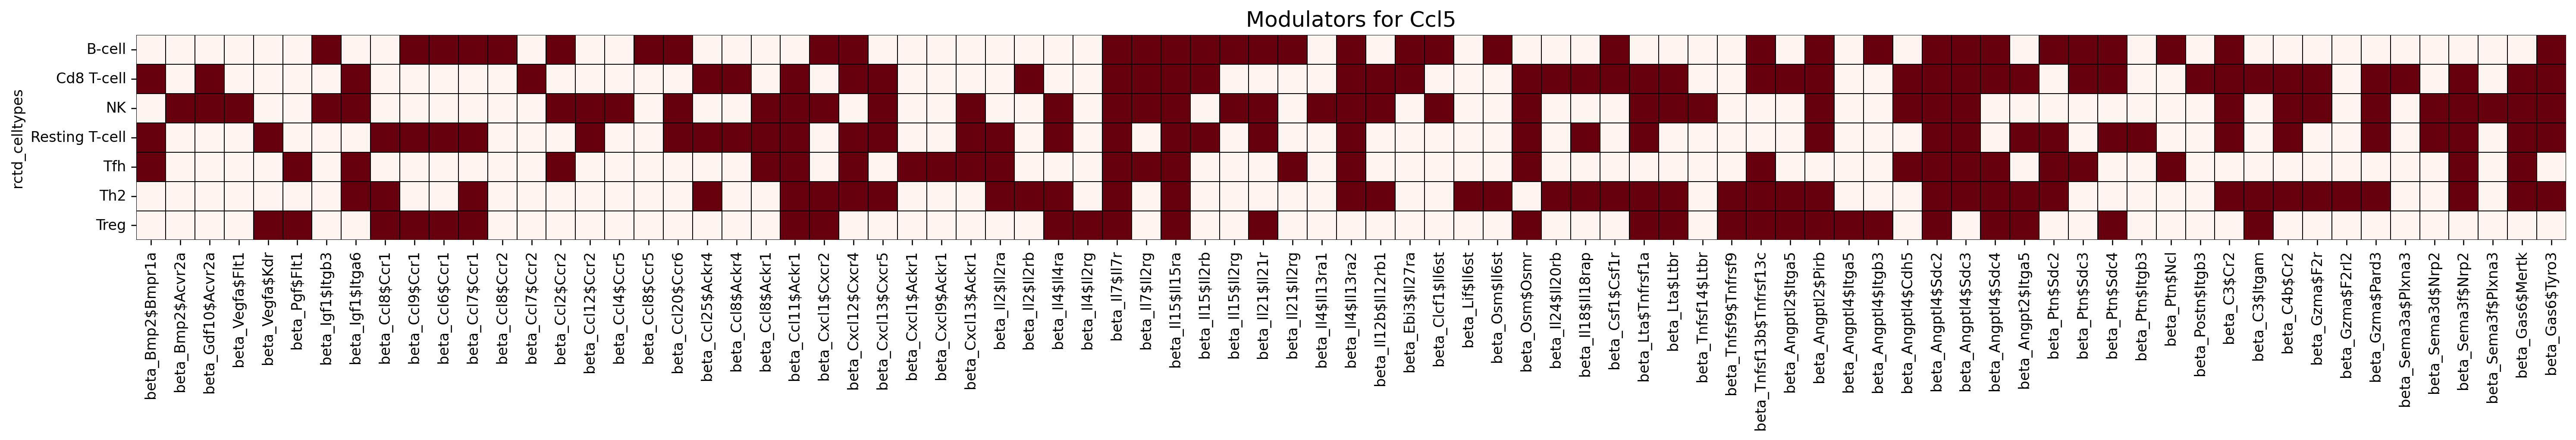

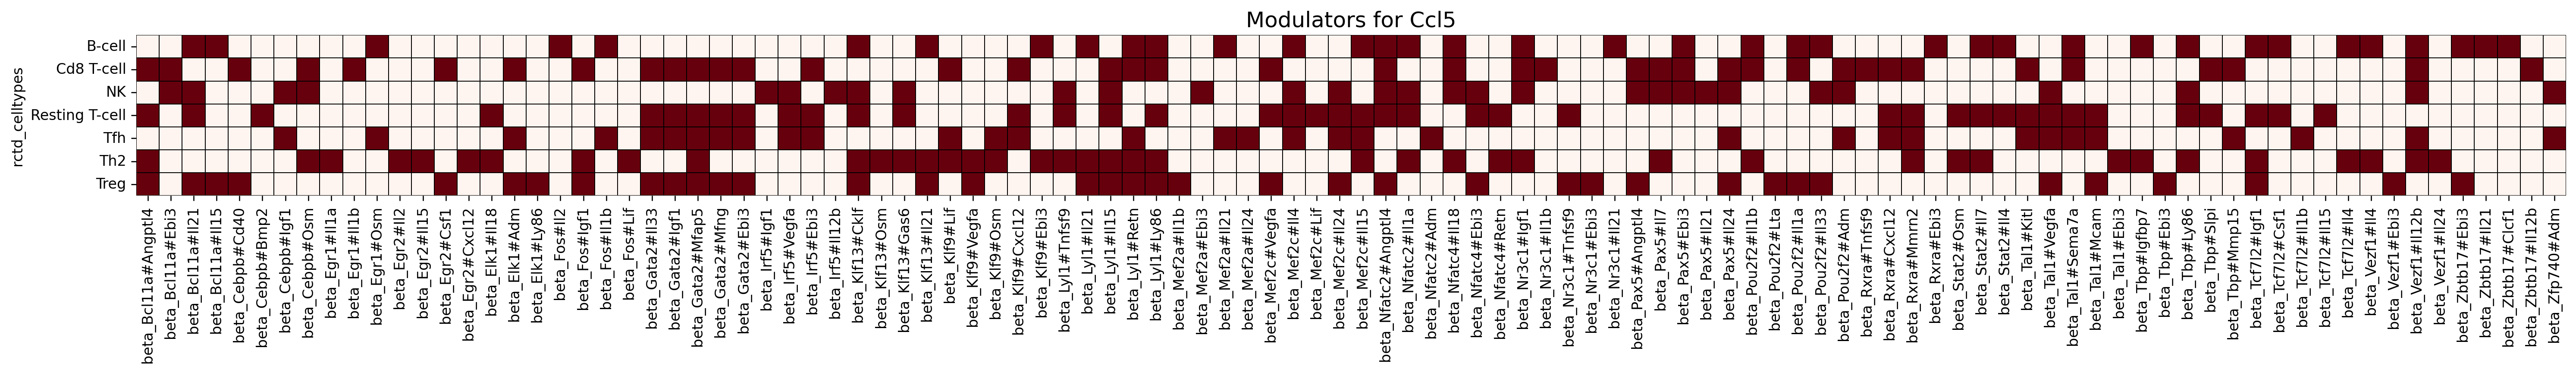

In [27]:
plt.rcParams['figure.figsize'] = (25, 10)
plt.rcParams['figure.dpi'] = 120

hmap = df[[
        'beta_'+i for i in estimator.modulators if '#' not in i and '$' not in i]+[
            'rctd_celltypes']].groupby('rctd_celltypes').mean().abs()>0
sns.heatmap(
    hmap.loc[:, (hmap.sum(0) > 0)],
    square=True,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=True,
    cmap='Reds'
)
plt.title(f'Modulators for {estimator.target_gene}', fontsize=15)
plt.tight_layout()
plt.show()
hmap = df[[
        'beta_'+i for i in estimator.modulators if '$' in i]+[
            'rctd_celltypes']].groupby('rctd_celltypes').mean().abs()>0
sns.heatmap(
    hmap.loc[:, (hmap.sum(0) > 0)],
    square=True,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=True,
    cmap='Reds'
)
plt.title(f'Modulators for {estimator.target_gene}', fontsize=15)
plt.tight_layout()
plt.show()
hmap = df[[
        'beta_'+i for i in estimator.modulators if '#' in i]+[
            'rctd_celltypes']].groupby('rctd_celltypes').mean().abs()>0
sns.heatmap(
    hmap.loc[:, (hmap.sum(0) > 0)],
    square=True,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=True,
    cmap='Reds'
)

plt.title(f'Modulators for {estimator.target_gene}', fontsize=15)
plt.tight_layout()
plt.show()

In [97]:
pd.read_parquet('/tmp/ligand_target.parquet')

A2M     AANAT     ABCA1       ACE      ACE2      ACP4  \
A-GAMMA3'E  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
A1BG        0.001850  0.001111  0.001423  0.002859  0.001139  0.001136   
A1BG-AS1    0.000740  0.000468  0.000519  0.000784  0.000375  0.000336   
A1CF        0.002480  0.001303  0.002042  0.004792  0.003273  0.001560   
A2M         0.008469  0.004069  0.006426  0.010519  0.005719  0.004568   
...              ...       ...       ...       ...       ...       ...   
ZYG11A      0.002756  0.001752  0.002926  0.004804  0.001714  0.002884   
ZYG11B      0.002610  0.001743  0.002380  0.003167  0.001662  0.002917   
ZYX         0.004213  0.002475  0.004070  0.008413  0.002530  0.003755   
ZZEF1       0.003451  0.002206  0.003380  0.006834  0.002196  0.003348   
ZZZ3        0.004493  0.002919  0.004702  0.007178  0.003160  0.004179   

              ADAM10    ADAM11    ADAM12    ADAM15  ...     WNT9A     WNT9B  \
A-GAMMA3'E  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
A1BG        0.001284  0.001290  0.001301  0.001174  ...  0.001041  0.000972   
A1BG-AS1    0.000482  0.001050  0.000843  0.000355  ...  0.000385  0.000340   
A1CF        0.003462  0.001533  0.002221  0.001663  ...  0.002379  0.001897   
A2M         0.008820  0.007715  0.005942  0.004794  ...  0.004795  0.004439   
...              ...       ...       ...       ...  ...       ...       ...   
ZYG11A      0.003701  0.002773  0.003051  0.002183  ...  0.002160  0.002045   
ZYG11B      0.003097  0.002586  0.002475  0.002068  ...  0.002605  0.002277   
ZYX         0.005860  0.003016  0.003446  0.003151  ...  0.003341  0.003062   
ZZEF1       0.003344  0.002917  0.003046  0.002942  ...  0.002336  0.002134   
ZZZ3        0.006229  0.004072  0.003878  0.003482  ...  0.003601  0.003291   

                XCL1      XCL2     YARS1    ZDHHC5     ZG16B     ZNRF3  \
A-GAMMA3'E  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
A1BG        0.001008  0.000943  0.001592  0.001520  0.001226  0.001021   
A1BG-AS1    0.000281  0.000292  0.000360  0.001884  0.000408  0.000335   
A1CF        0.001296  0.001355  0.001797  0.001952  0.001690  0.001922   
A2M         0.004723  0.004636  0.005777  0.005476  0.005606  0.004587   
...              ...       ...       ...       ...       ...       ...   
ZYG11A      0.001395  0.001445  0.002455  0.002424  0.002507  0.002704   
ZYG11B      0.001496  0.001527  0.002237  0.003468  0.002398  0.002110   
ZYX         0.002653  0.002398  0.003641  0.003842  0.003505  0.003892   
ZZEF1       0.001912  0.001928  0.003002  0.003762  0.003041  0.002348   
ZZZ3        0.002363  0.002572  0.003940  0.004688  0.004439  0.003297   

                 ZP3     ZPBP2  
A-GAMMA3'E  0.000000  0.000000  
A1BG        0.001388  0.001210  
A1BG-AS1    0.000614  0.000338  
A1CF        0.002879  0.001534  
A2M         0.005468  0.005185  
...              ...       ...  
ZYG11A      0.002589  0.002388  
ZYG11B      0.002891  0.002312  
ZYX         0.004124  0.003033  
ZZEF1       0.002815  0.002507  
ZZZ3        0.005233  0.003711  

[33354 rows x 1226 columns]

In [59]:
y_pred = CellularNicheNetwork.predict_y(inputs_x, betas)

In [60]:
r2_score(
    estimator.train_df[estimator.target_gene], 
    y_pred.cpu().numpy()
)


0.9270298260382879

In [61]:
cmaps = dict(zip(range(7), ['rainbow', 'hot', 'cool_r', 'spring', 'viridis', 'PuRd', 'Reds']))


In [62]:
df[['beta0']+['beta_'+i for i in estimator.modulators]].mean().sort_values(ascending=False)[:20]

beta0                0.291444
beta_Cxcl12$Cxcr4    0.136510
beta_Il7$Il7r        0.128843
beta_Il15$Il15ra     0.099659
beta_Il21$Il2rg      0.070131
beta_Nfatc4          0.067123
beta_Il4#Mef2c       0.065816
beta_Mef2a           0.063456
beta_Rxra            0.057673
beta_Klf9            0.053066
beta_Angptl4$Sdc2    0.051441
beta_Angptl4$Sdc3    0.050382
beta_Il21#Bcl11a     0.041000
beta_Klf13           0.038673
beta_Ptn$Sdc4        0.037779
beta_Ly86#Lyl1       0.037240
beta_Ccl6$Ccr1       0.033562
beta_Il4$Il13ra2     0.033534
beta_Igf1#Tcf7l2     0.032518
beta_Osm#Klf9        0.031790
dtype: float32

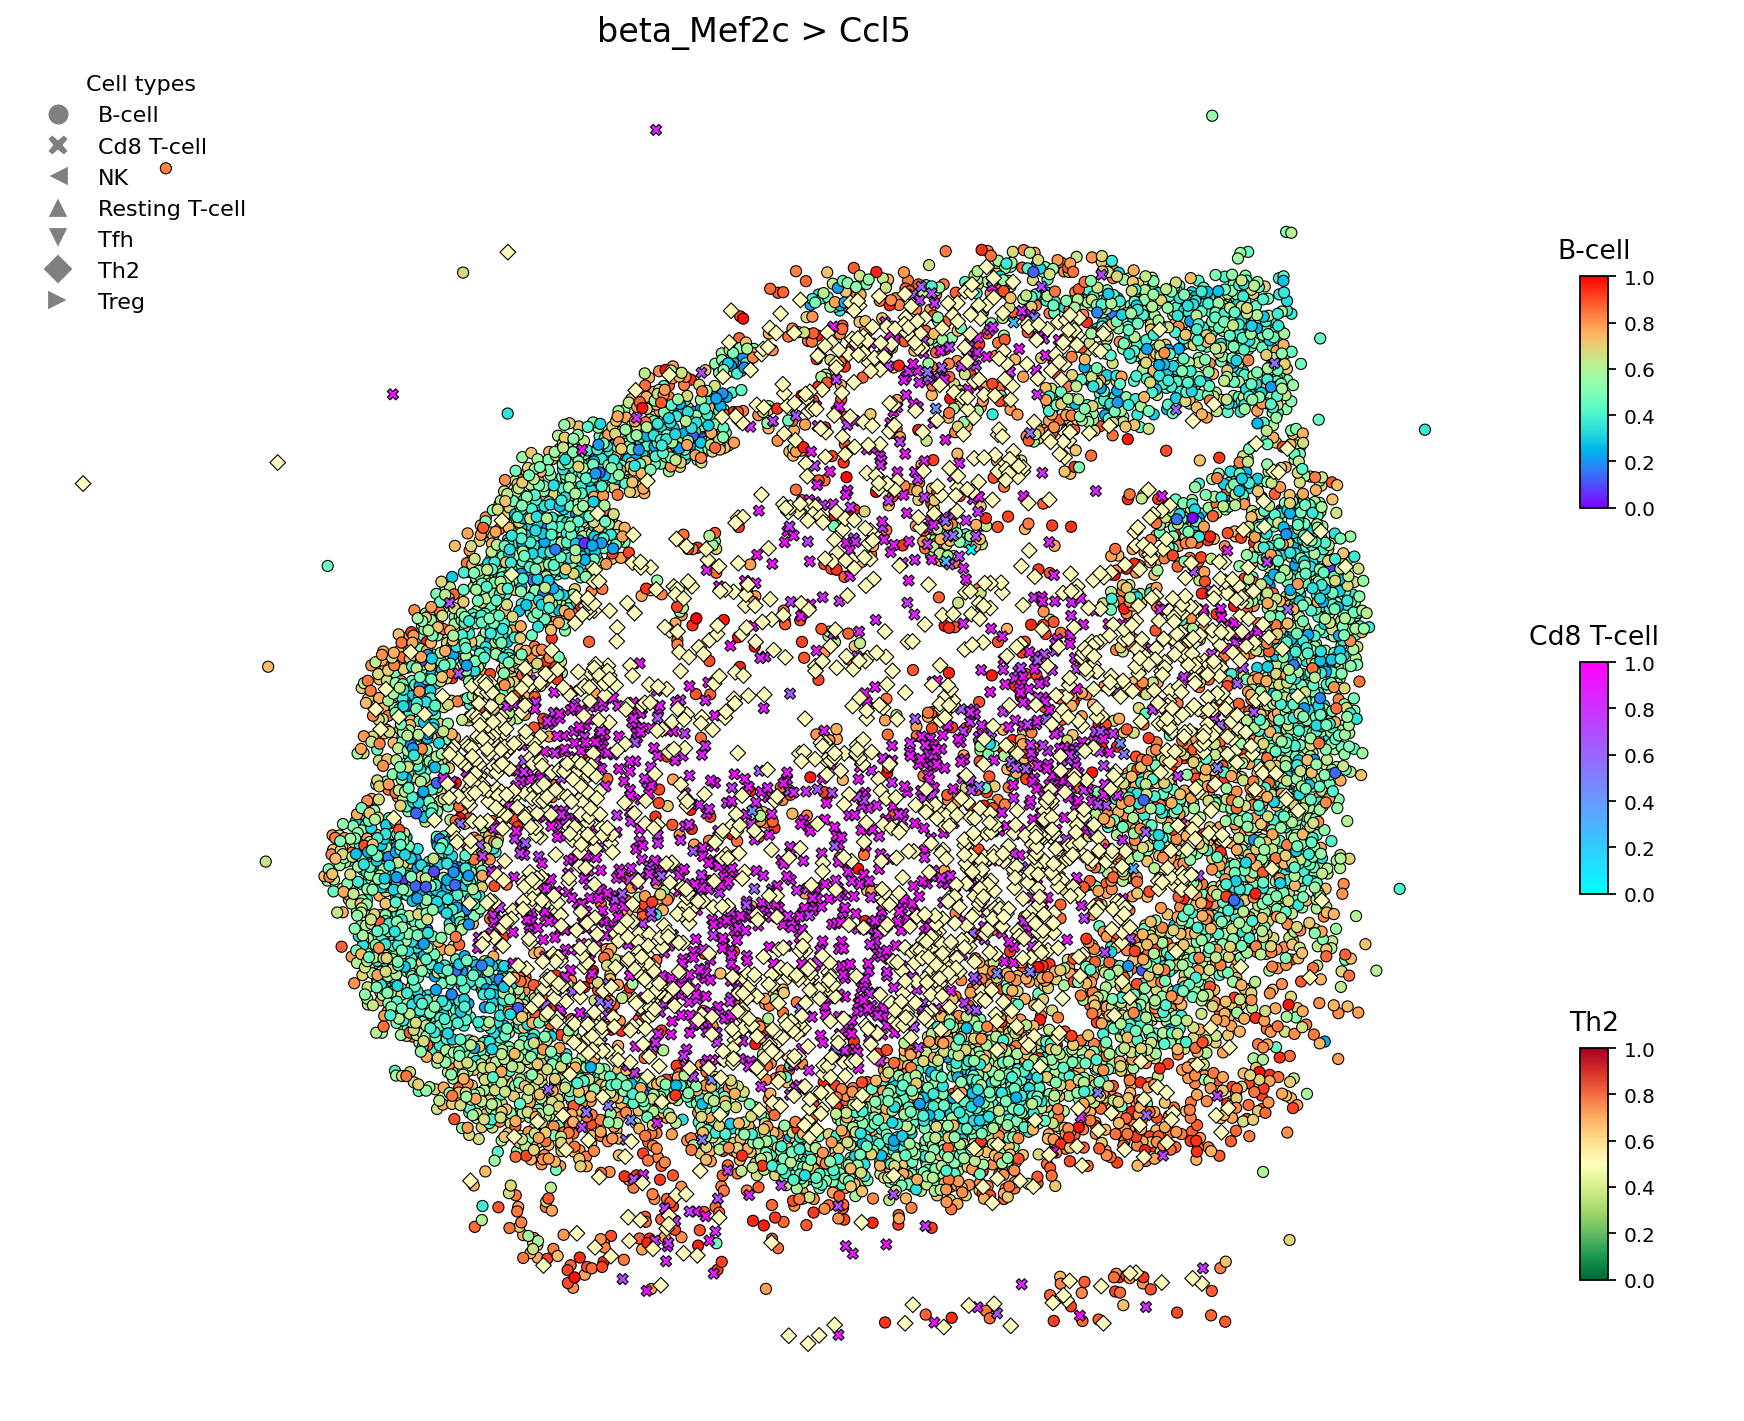

In [89]:
markers = ['o', 'X', '<', '^', 'v', 'D', '>']
cmaps = dict(zip(range(7), ['rainbow', 'cool', 'RdYlGn_r', 'spring_r', '', 'PuRd', 'Reds']))

# plot_for = 'beta_Il4#Mef2c'
plot_for = 'beta_Mef2c'

cell_map = dict(zip(df['rctd_cluster'], df['rctd_celltypes']))

fig, (ax, cax) = plt.subplots(1, 2, dpi=80, figsize=(11, 9), gridspec_kw={'width_ratios': [4, 0.5]})

for i in [0, 1, 2]:
    betas_df = df[['beta0']+['beta_'+i for i in np.unique(estimator.modulators+estimator.ligands+estimator.receptors)]][df.rctd_cluster==i]
    betas_df = betas_df.join(estimator.train_df)
    betas_df[plot_for] = betas_df[plot_for]*betas_df[plot_for.replace('beta_', '')]

    sns.scatterplot(
        data=betas_df.join(df[['x', 'y', 'rctd_celltypes']]),
        x='x', 
        y='y',
        hue=plot_for,
        palette=cmaps[i],
        s=25,
        # alpha=1 if i == 0 else 0.1,
        alpha=1,
        linewidth=0.5,
        edgecolor='black',
        legend=False,
        style='rctd_celltypes',
        markers=markers,
        ax=ax
    )
ax.axis('off')

norm = None

cbar_width = 0.15  # Width of each colorbar
cbar_height = 0.8 / len(cmaps)  # Height of each colorbar
for i, cmap_name in cmaps.items():
    if i not in [0, 1, 2]:
        continue
    cmap = plt.get_cmap(cmap_name)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cax_i = cax.inset_axes([0.2, 0.95 - (i+1)*cbar_height*2.5, cbar_width, cbar_height*1.5])
    cbar = fig.colorbar(sm, cax=cax_i, orientation='vertical')
    cbar.ax.tick_params(labelsize=9)  # Reduce tick label size
    cbar.ax.set_title(f'{cell_map[i]}', fontsize=12, pad=8)  # Reduce title size and padding

cax.set_ylabel(plot_for, fontsize=8)
cax.axis('off')

unique_styles = sorted(set(df['rctd_celltypes']))
style_handles = [plt.Line2D([0], [0], marker=m, color='w', markerfacecolor='gray', 
                markersize=10, linestyle='None', alpha=1) 
                for m in markers][:len(unique_styles)]
ax.legend(style_handles, unique_styles, ncol=1,
    title='Cell types', loc='upper left', 
    frameon=False)

ax.set_title(f'{plot_for} > {estimator.target_gene}', fontsize=15)
plt.tight_layout()
# plt.savefig(f'/tmp/{plot_for}_to_{estimator.target_gene}.svg', dpi=300, format='svg')
plt.show()

In [85]:
df[plot_for].min(), df[plot_for].max()


(-0.49740916, 0.0)

<Axes: ylabel='Frequency'>

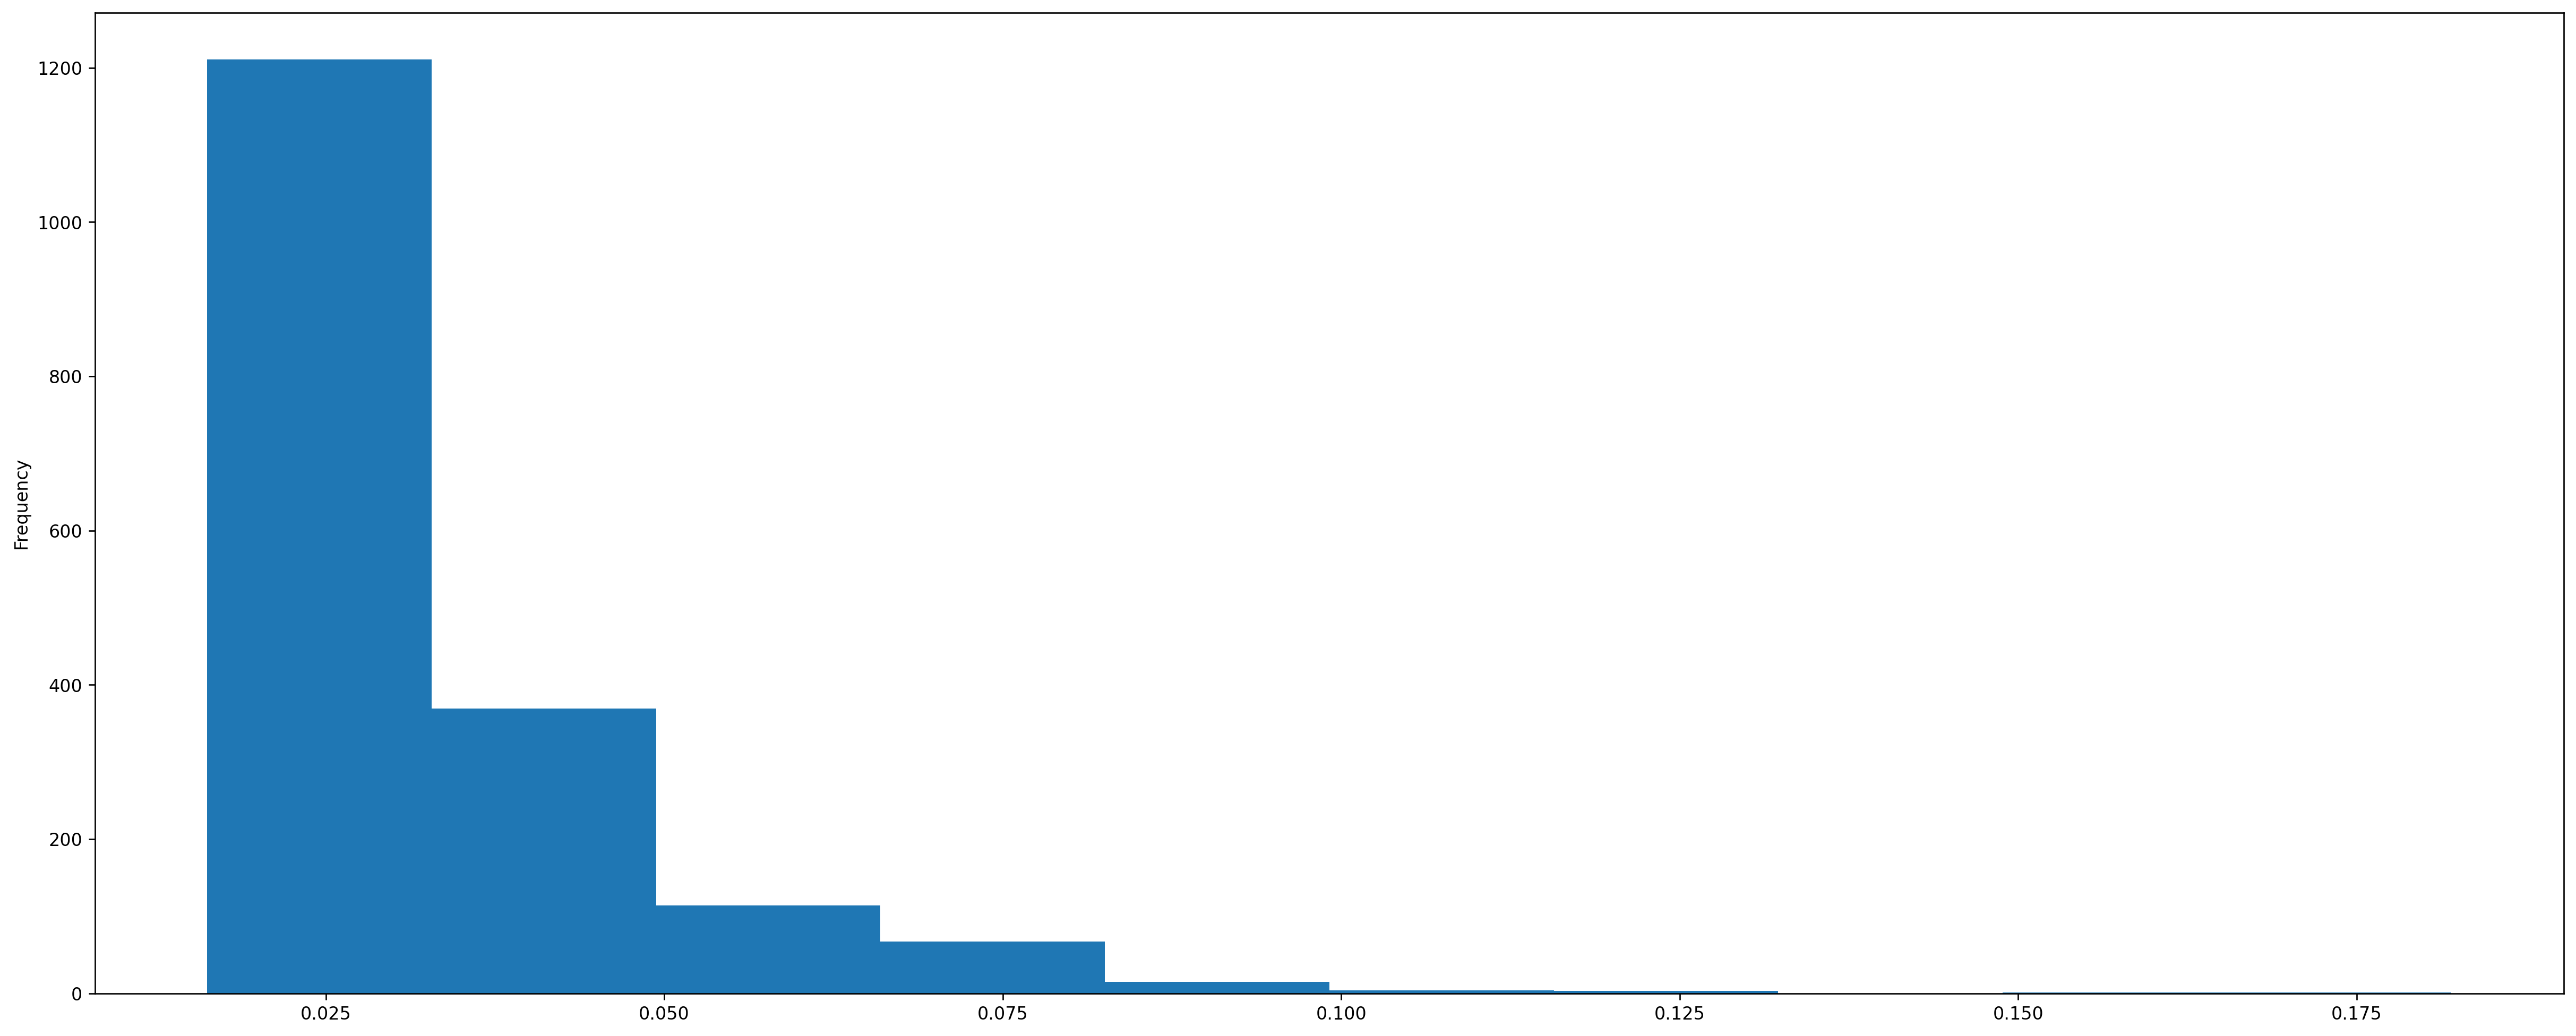

In [79]:
estimator.adata.to_df(
    layer=estimator.layer)[['Mef2c']].join(
        estimator.adata.obs['rctd_celltypes']).query('rctd_celltypes == "Th2"')['Mef2c'].plot(kind='hist')

In [64]:
[i for i in estimator.train_df.columns if 'Mef2c' in i]

['Mef2c', 'Vegfa#Mef2c', 'Il4#Mef2c', 'Lif#Mef2c', 'Il24#Mef2c', 'Il15#Mef2c']

In [40]:
betas_df[plot_for]

AAAAAACGGTAGAT    0.096043
AAAAACCGTCAGAC    0.096121
AAAAACGCTCCGAC    0.096137
AAAAAGCACGTGTT    0.096116
AAAAATGCATGCTT    0.096074
                    ...   
TTTTTTACATCATC    0.096167
TTTTTTAGTTGTCA    0.096140
TTTTTTATAATACC    0.096132
TTTTTTGTACGATT    0.096144
TTTTTTTTGCTTTA    0.096059
Name: beta_Mef2c#Il4, Length: 7531, dtype: float32

In [72]:
betas_df.mean(0).sort_values(ascending=False)

beta_Il12b$Il12rb1    2.076784e-08
beta_Ebf1             2.026131e-08
beta_Ccl2$Ackr1       1.823518e-08
beta_Ptn$Ncl          1.722211e-08
beta_Gas6$Mertk       1.519598e-08
                          ...     
beta_Gdf10$Acvr2a    -1.671558e-08
beta_Csf1$Csf1r      -2.076784e-08
beta_Angptl2$Pirb    -2.127437e-08
beta_Bcl11a          -2.127437e-08
beta_Ptn$Sdc4        -2.228744e-08
Length: 132, dtype: float32

In [40]:
from sklearn.preprocessing import StandardScaler


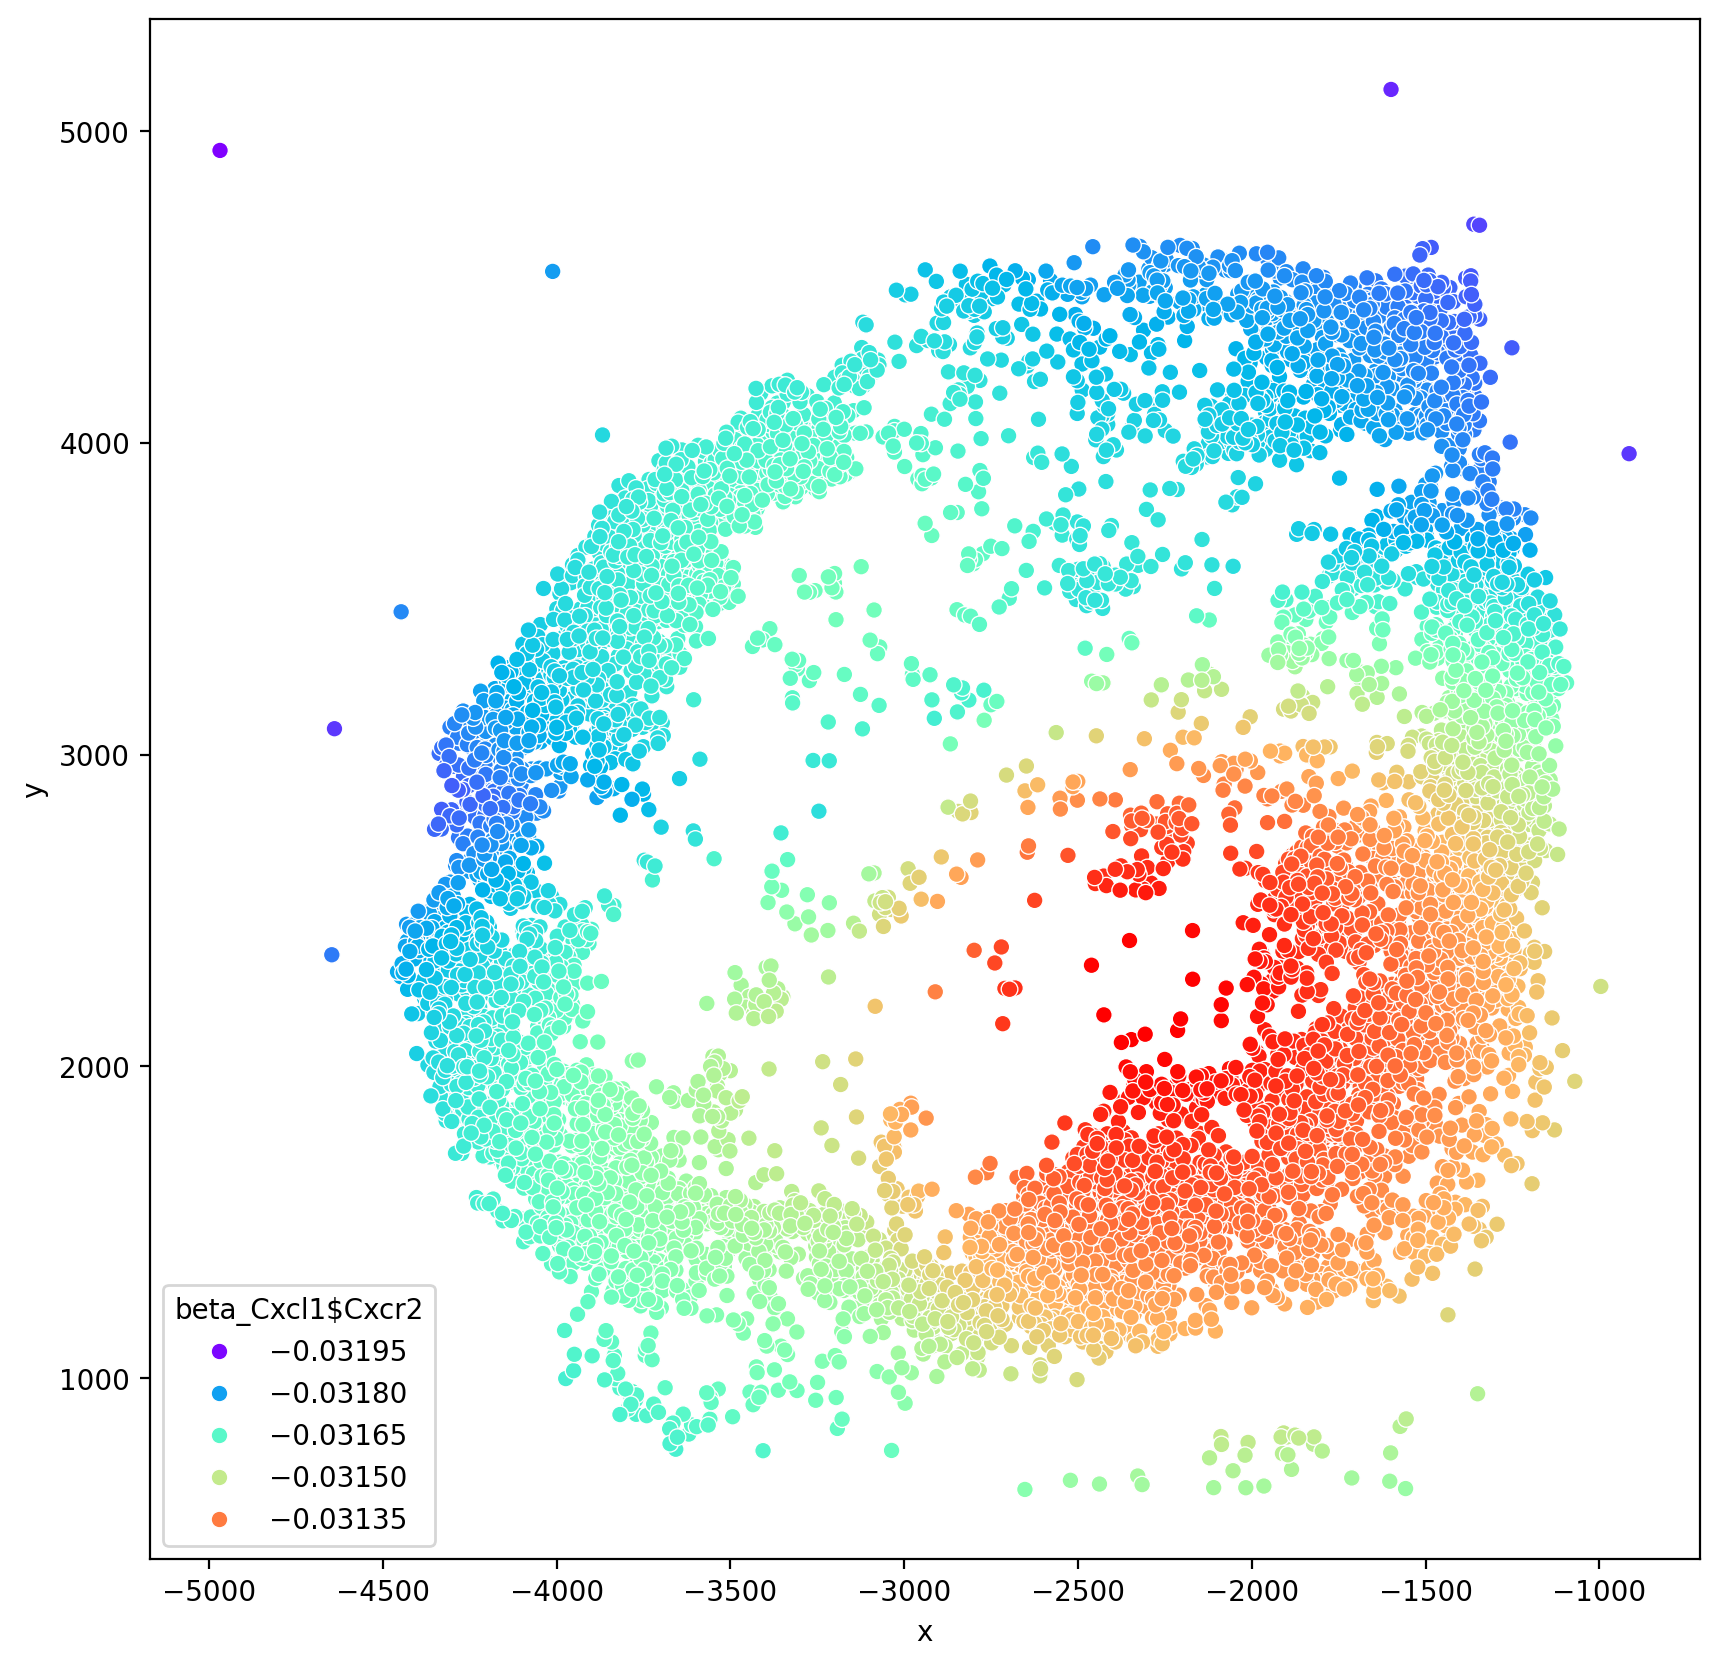

In [39]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.scatterplot(data=df[['beta_Cxcl1$Cxcr2']].join(df[['x', 'y']])[df.rctd_cluster==0],
     x='x', y='y', hue='beta_Cxcl1$Cxcr2', palette='rainbow')
plt.show()

In [234]:
df[['rctd_cluster', 'rctd_celltypes']]

rctd_cluster rctd_celltypes
AAAAAACGGTAGAT            0         B-cell
AAAAAATCCGGCGA            4            Tfh
AAAAACCGTCAGAC            0         B-cell
AAAAACGCTCCGAC            0         B-cell
AAAAAGCACGTGTT            0         B-cell
...                     ...            ...
TTTTTTCGCGGCTA            4            Tfh
TTTTTTGGGCTGGT            2            Th2
TTTTTTGTACCCAC            2            Th2
TTTTTTGTACGATT            0         B-cell
TTTTTTTTGCTTTA            0         B-cell

[11567 rows x 2 columns]

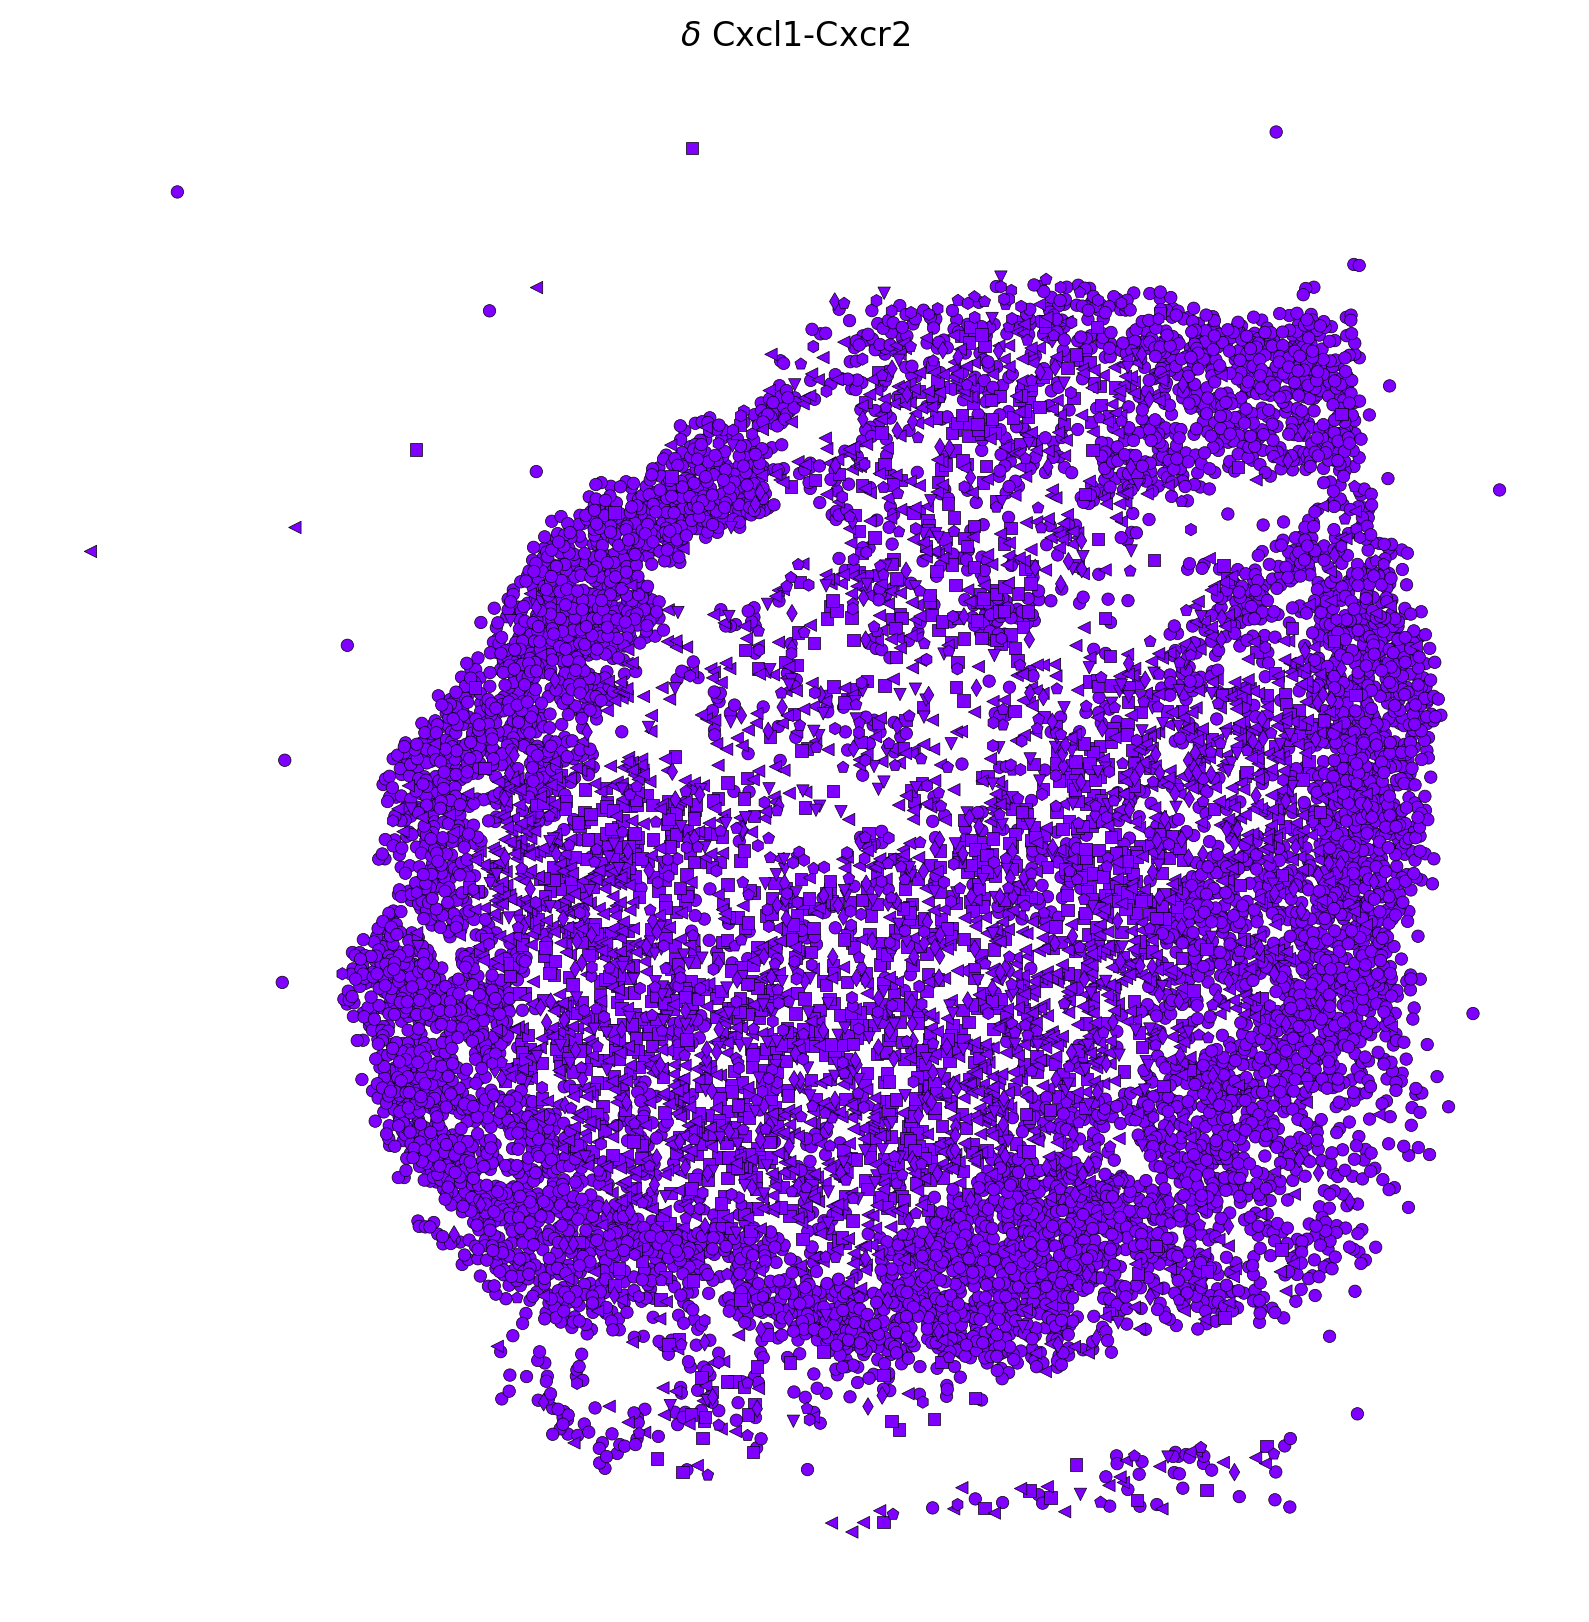

In [240]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 100
clusters = range(7)
markers = ['o', 's', '<', 'v', 'd', 'p', 'h']

for cluster, marker in zip(clusters, markers):
    data = df[df.rctd_cluster == cluster].copy()
    data['beta_Pax5'] = data['beta_Pax5'].mean()
    sns.scatterplot(data=data, x='x', y='y', hue='beta_Pax5',
                    linewidth=0.25, edgecolor='black',
                    palette='rainbow', marker=marker, legend=False, s=20)

# plt.colorbar(label='beta_Cxcl1$Cxcr2')
# Remove frame and ticks
plt.gca().set_frame_on(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title(r'$\delta$'+ f' Cxcl1-Cxcr2')
plt.show()

0.9722947128576629


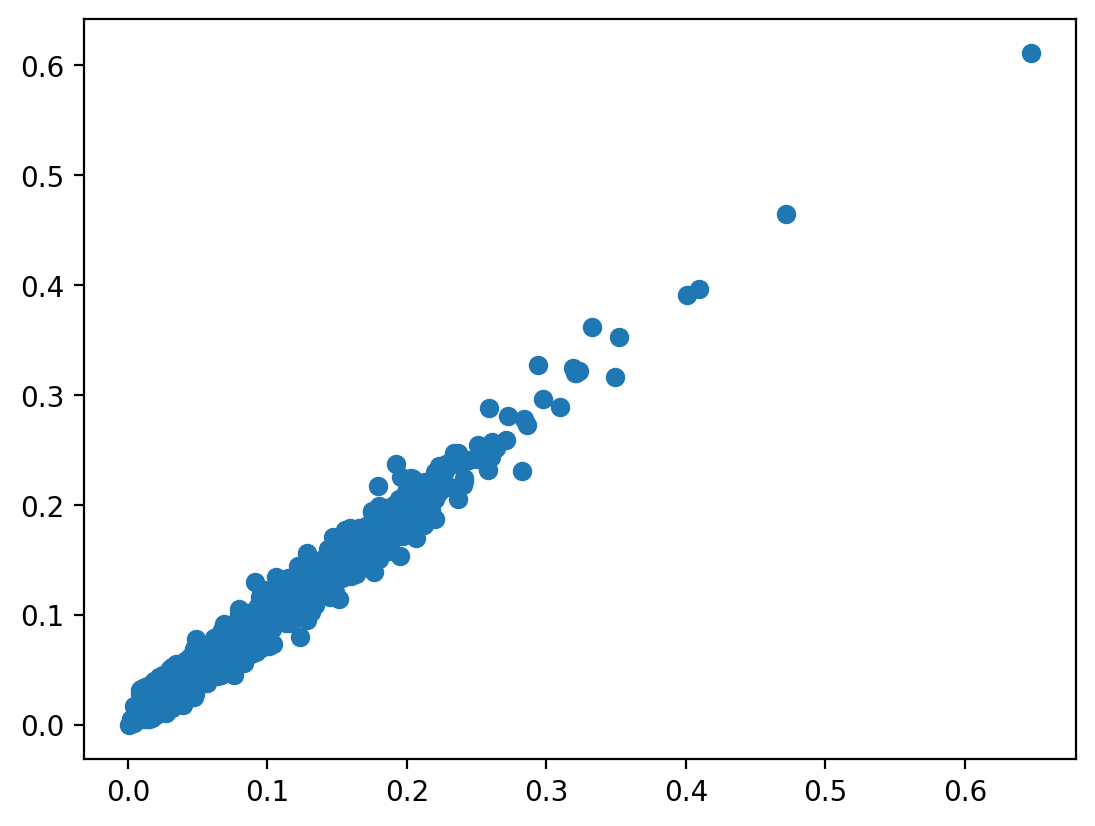

In [128]:
y_pred = (estimator.Xn[estimator.cluster_labels==2] @ b[estimator.cluster_labels==2].values[:, 1:].mean(0).T) + b[estimator.cluster_labels==2].values[:, 0].mean(0)
plt.scatter(estimator.yn[estimator.cluster_labels==2], y_pred)
print(r2_score(estimator.yn[estimator.cluster_labels==2], y_pred))

In [125]:
y_pred = torch.matmul(
                torch.from_numpy(estimator.Xn[estimator.cluster_labels==2]).unsqueeze(1).float(), 
                torch.from_numpy(b[estimator.cluster_labels==2].values)[:, 1:].unsqueeze(2).float()
            ).squeeze(1).squeeze(1) + \
                torch.from_numpy(b[estimator.cluster_labels==2].values)[:, 0].float()

0.9722973714230045


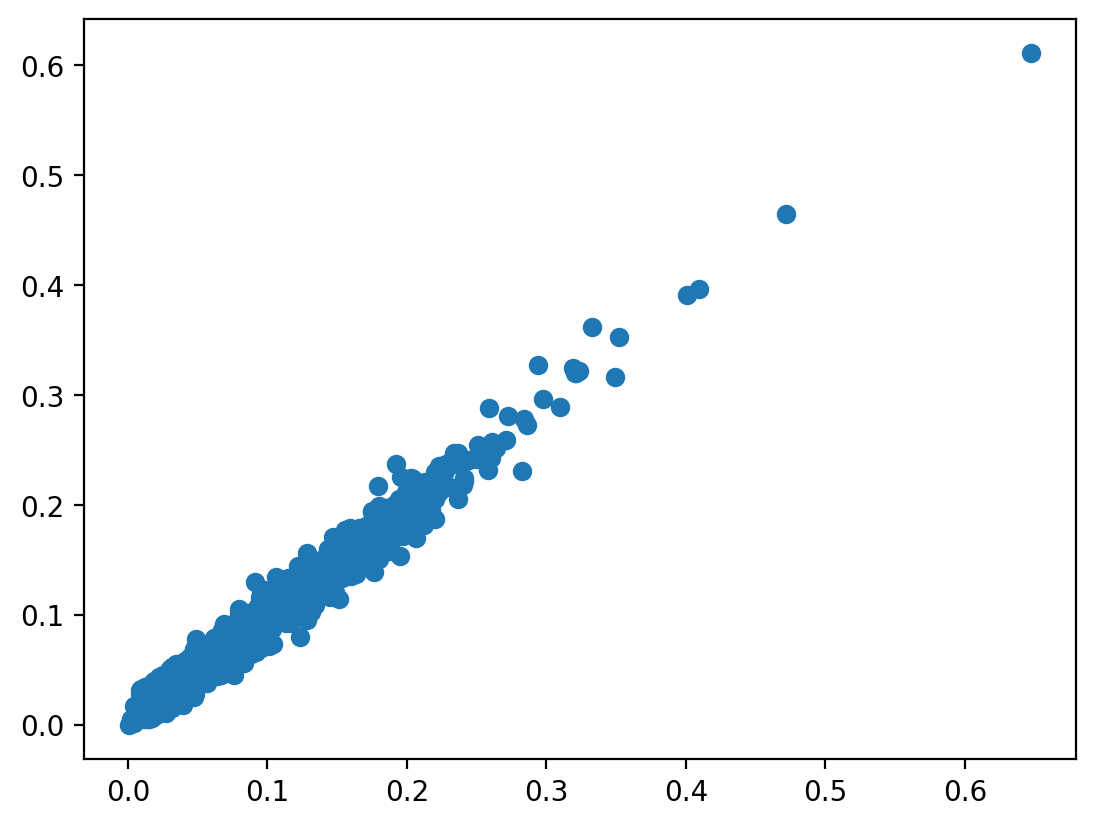

In [127]:
plt.scatter(estimator.yn[estimator.cluster_labels==2], y_pred.cpu().numpy())
print(r2_score(estimator.yn[estimator.cluster_labels==2], y_pred.cpu().numpy()))

In [102]:
b[estimator.cluster_labels==0].values[:, 0].shape

(7531,)

In [106]:
b[estimator.cluster_labels==0].values[:, 1:].mean(0).shape

(131,)

In [47]:
b1 = estimator.get_betas(1)

In [48]:
b0.shape, b1.shape

((7531, 132), (1246, 132))

In [49]:
estimator.modulators.index('Pax5')

21

In [50]:
[(x, estimator.models[x].anchors[22].item()) for x in range(7)]

[(0, 0.11134880036115646),
 (1, 0.21343275904655457),
 (2, 0.20137250423431396),
 (3, 0.24226118624210358),
 (4, 0.20296435058116913),
 (5, 0.16821637749671936),
 (6, 0.19996456801891327)]

In [51]:
estimator.yn[estimator.cluster_labels==0].mean()

0.4733534782902476

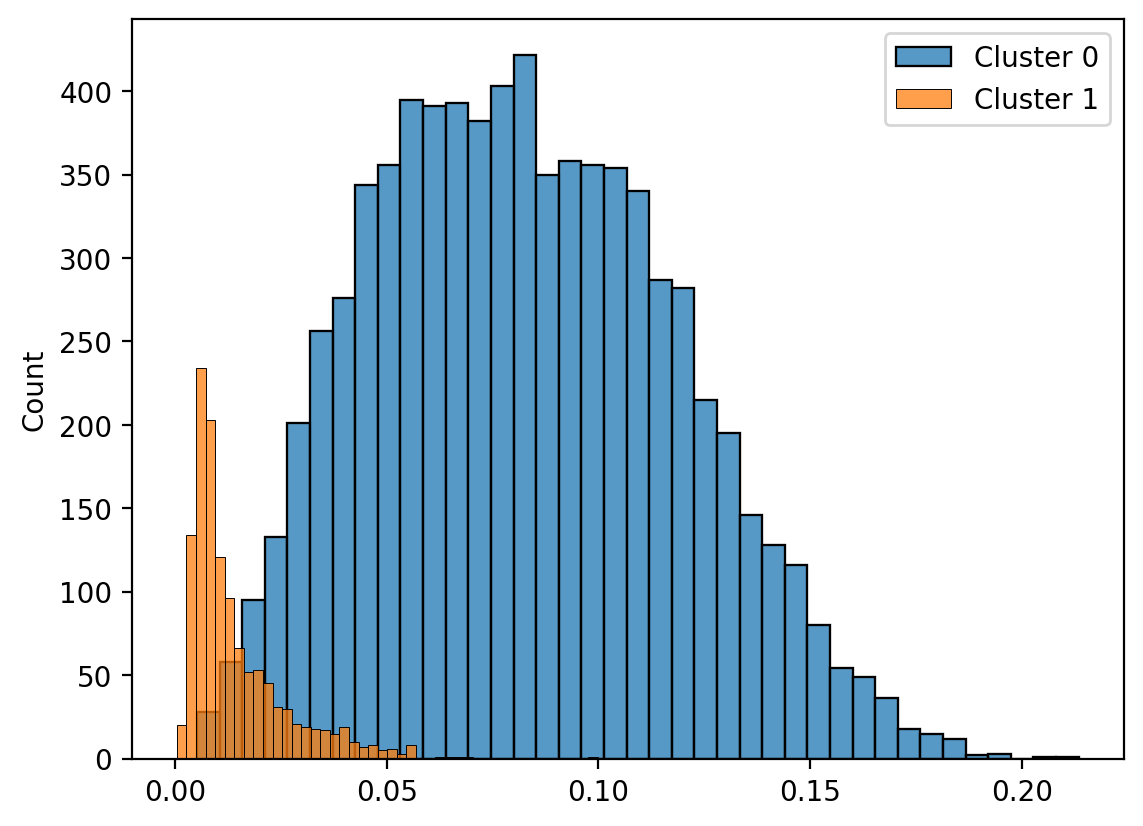

In [67]:
sns.histplot(estimator.Xn[estimator.cluster_labels==0][:, 21]*estimator.models[1].anchors[22].item(), label='Cluster 0')
sns.histplot(estimator.Xn[estimator.cluster_labels==1][:, 21]*estimator.models[1].anchors[22].item(), label='Cluster 1')
plt.legend()
plt.show()

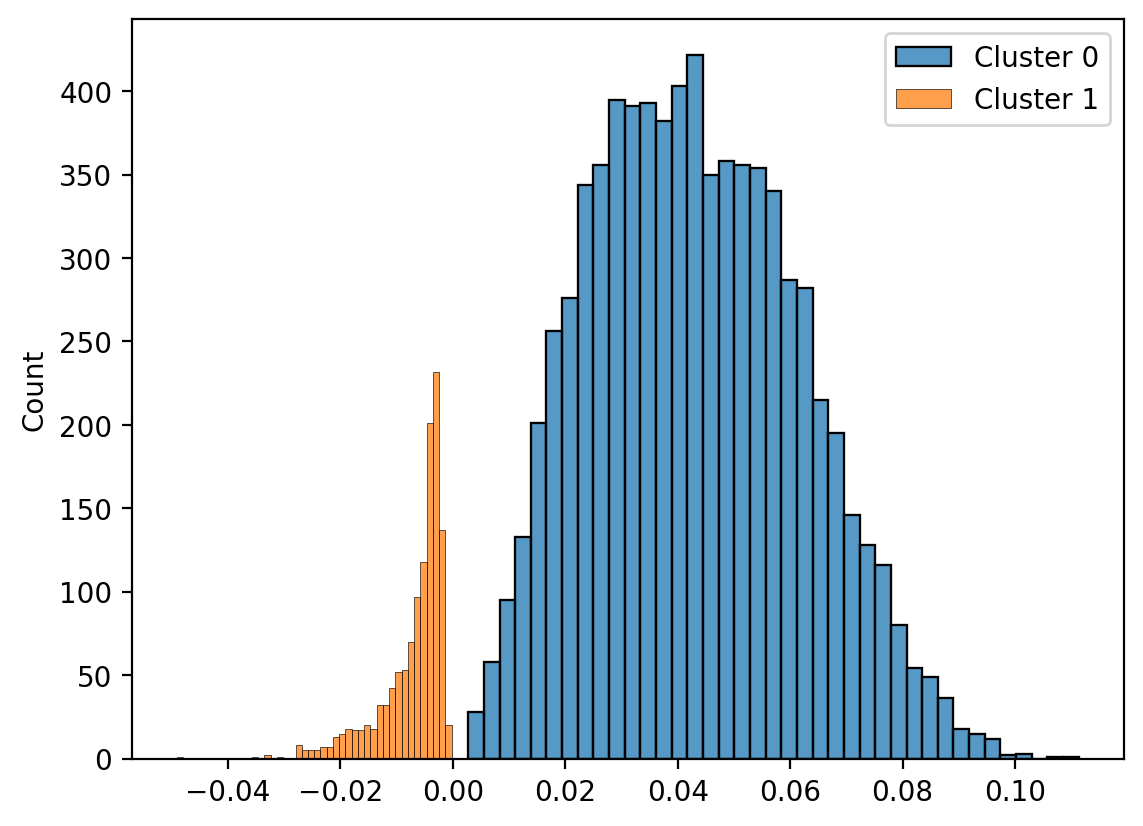

In [78]:
sns.histplot(estimator.Xn[estimator.cluster_labels==0][:, 21]*b0[:, 22], label='Cluster 0')
sns.histplot(estimator.Xn[estimator.cluster_labels==1][:, 21]*b1[:, 22], label='Cluster 1')
plt.legend()
plt.show()

In [59]:
estimator.Xn[estimator.cluster_labels==1][:, 21]*estimator.models[1].anchors[22].item()


array([0.01862047, 0.01619013, 0.0065103 , ..., 0.00693913, 0.0142291 ,
       0.02362541])

In [58]:
estimator.models[1].anchors[22].item()

0.21343275904655457

In [28]:
estimator.models[2].anchors[22]


tensor(0.2077, device='mps:0')

In [22]:
b1[:, 22].mean()

0.20782451

In [23]:
b0[:, 22].mean()

0.10963446

<Axes: ylabel='Density'>

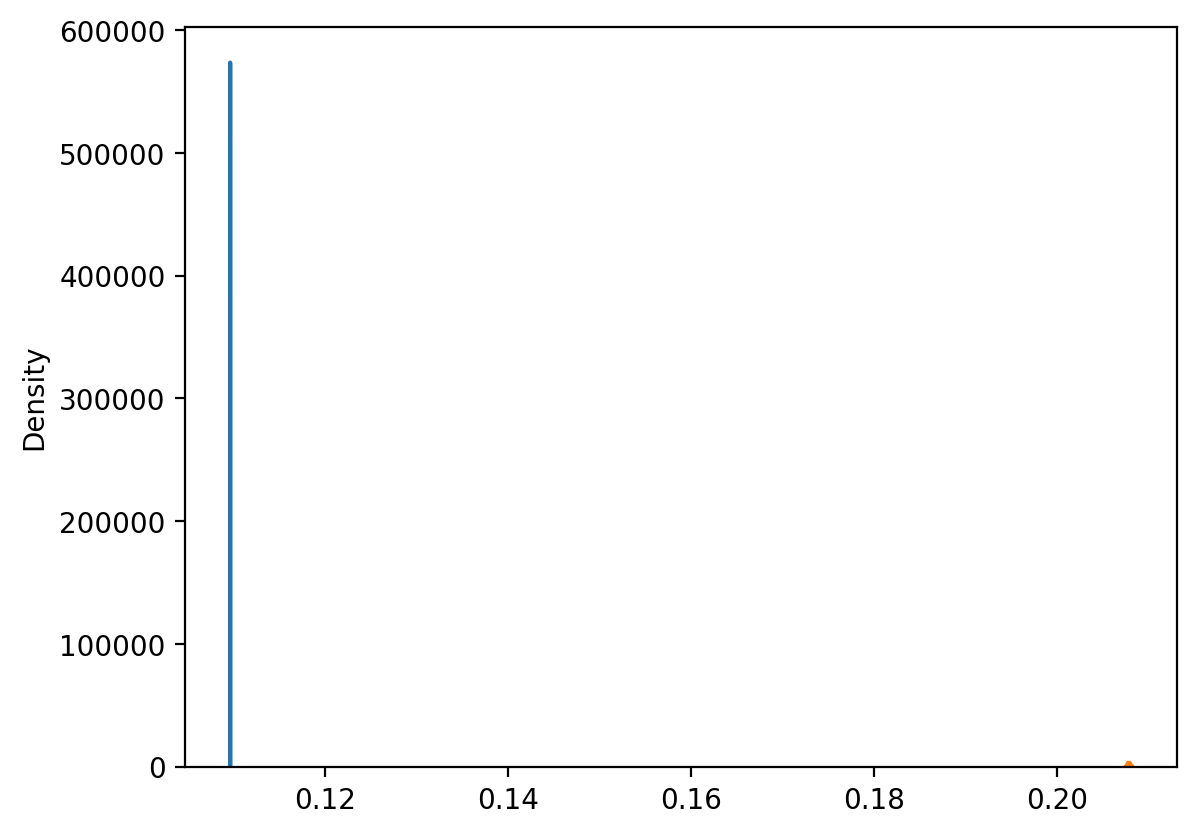

In [21]:
sns.kdeplot(b0[:, 22])
sns.kdeplot()


<Axes: ylabel='Count'>

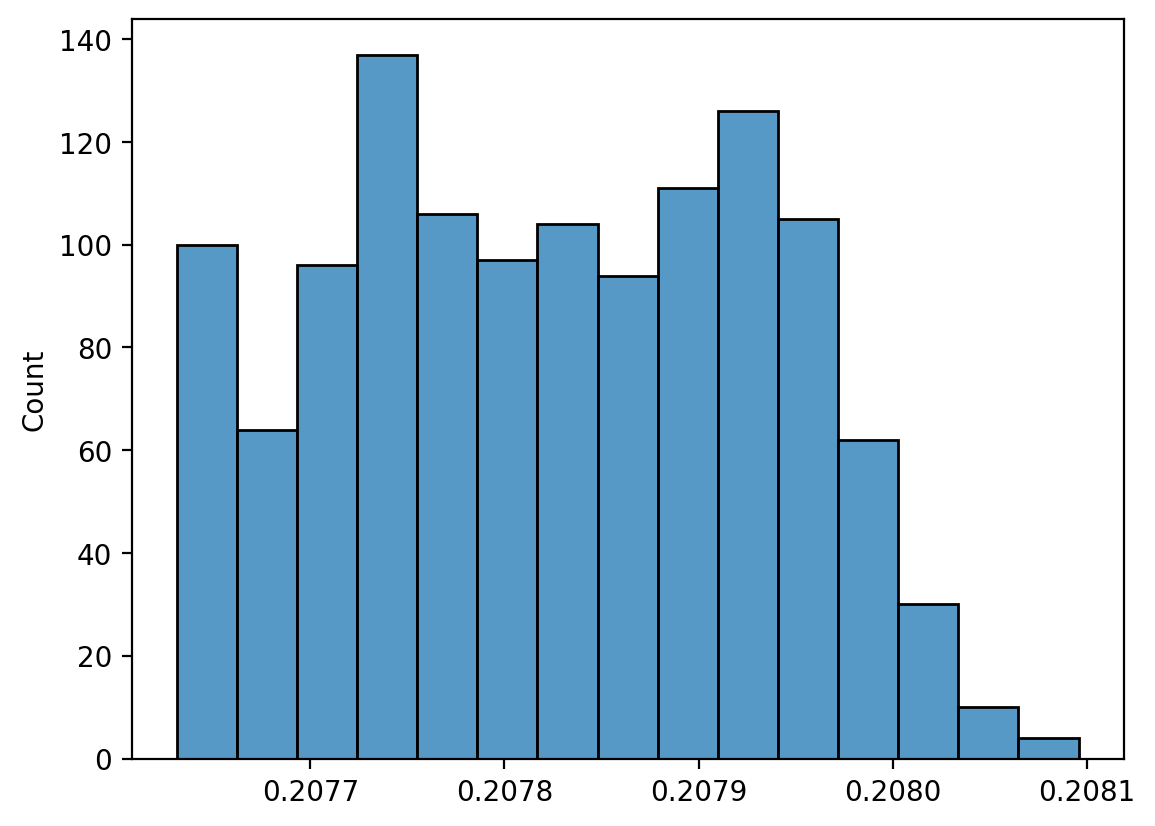

In [19]:
sns.histplot(b1[:, 22])

In [145]:
estimator.spatial_maps.shape

(15870, 7, 64, 64)

In [144]:
estimator.models[0].get_betas()

CellularNicheNetwork(
  (conditional_conv): Conv2d(1, 1, kernel_size=(1, 1), stride=(1, 1))
  (sigmoid): Sigmoid()
  (conv_layers): Sequential(
    (0): ParametrizedConv2d(
      1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0): _WeightNorm()
        )
      )
    )
    (1): PReLU(num_parameters=1)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ParametrizedConv2d(
      32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0): _WeightNorm()
        )
      )
    )
    (4): PReLU(num_parameters=1)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ParametrizedConv2d(
      64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0

In [14]:
from tqdm import tqdm
import enlighten
from sklearn.metrics import r2_score

In [15]:
device = torch.device('mps')

In [16]:
from torch import nn

In [54]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.linear_model import ARDRegression


In [51]:
clusters = np.array(estimator.adata.obs[estimator.cluster_annot].values)
i = 0
X = torch.from_numpy(estimator.Xn[clusters==i]).float()
y = torch.from_numpy(estimator.yn[clusters==i]).float()
sp = torch.from_numpy(estimator.spatial_maps[clusters==i][:, i:i+1, :, :]).float()

In [55]:
ard = ARDRegression()
ard.fit(X.cpu().numpy(), y.cpu().numpy())

ARDRegression()

In [89]:
r2_score(y, ard.predict(X.cpu().numpy()))

0.9828391075134277

In [117]:
model = CellularNicheNetwork(115, anchors=np.hstack([ard.intercept_, ard.coef_])).to(device)


dataset = TensorDataset(sp, X, y)
loader = DataLoader(dataset, batch_size=512, shuffle=True)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
r2_scores = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    all_y_true = []
    all_y_pred = []
    
    for batch in loader:
        spatial_maps, inputs, targets = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        outputs = model(spatial_maps, inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        all_y_true.extend(targets.cpu().detach().numpy())
        all_y_pred.extend(outputs.cpu().detach().numpy())
    
    # Calculate R2 score
    r2 = r2_score(all_y_true, all_y_pred)
    r2_scores.append(r2)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(loader):.4f}, R2: {r2:.4f}")



Epoch [1/20], Loss: 0.0484, R2: -0.3428
Epoch [2/20], Loss: 0.0016, R2: 0.9568
Epoch [3/20], Loss: 0.0011, R2: 0.9708
Epoch [4/20], Loss: 0.0010, R2: 0.9743
Epoch [5/20], Loss: 0.0009, R2: 0.9758
Epoch [6/20], Loss: 0.0009, R2: 0.9770
Epoch [7/20], Loss: 0.0008, R2: 0.9778
Epoch [8/20], Loss: 0.0008, R2: 0.9787
Epoch [9/20], Loss: 0.0008, R2: 0.9793
Epoch [10/20], Loss: 0.0008, R2: 0.9795
Epoch [11/20], Loss: 0.0007, R2: 0.9798
Epoch [12/20], Loss: 0.0007, R2: 0.9808
Epoch [13/20], Loss: 0.0007, R2: 0.9810
Epoch [14/20], Loss: 0.0007, R2: 0.9816
Epoch [15/20], Loss: 0.0007, R2: 0.9815
Epoch [16/20], Loss: 0.0007, R2: 0.9818
Epoch [17/20], Loss: 0.0007, R2: 0.9818
Epoch [18/20], Loss: 0.0007, R2: 0.9818
Epoch [19/20], Loss: 0.0007, R2: 0.9818
Epoch [20/20], Loss: 0.0007, R2: 0.9820


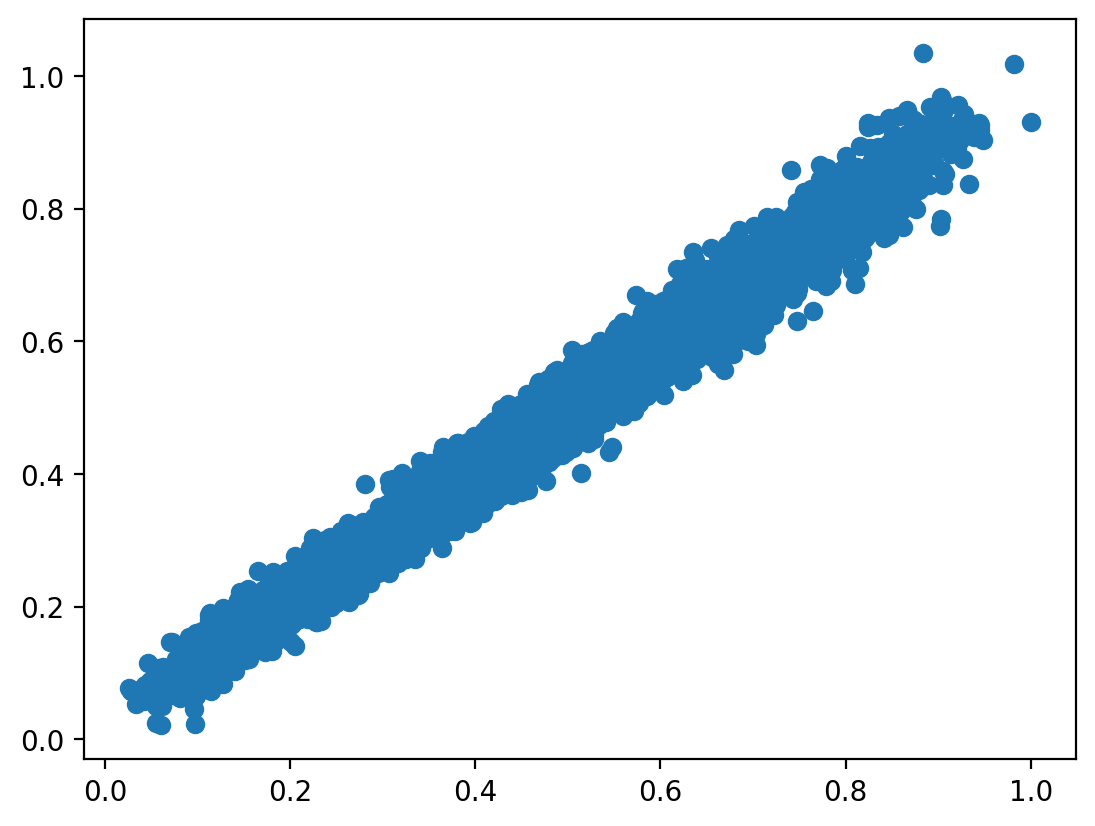

In [118]:
plt.scatter(all_y_true, all_y_pred)

In [119]:
with torch.no_grad():
    model.eval()
    betas = model.get_betas(sp[:].to(device))
betas.shape


torch.Size([10433, 116])

In [120]:
bb = betas[:, 1:].cpu().numpy()

<Axes: ylabel='Count'>

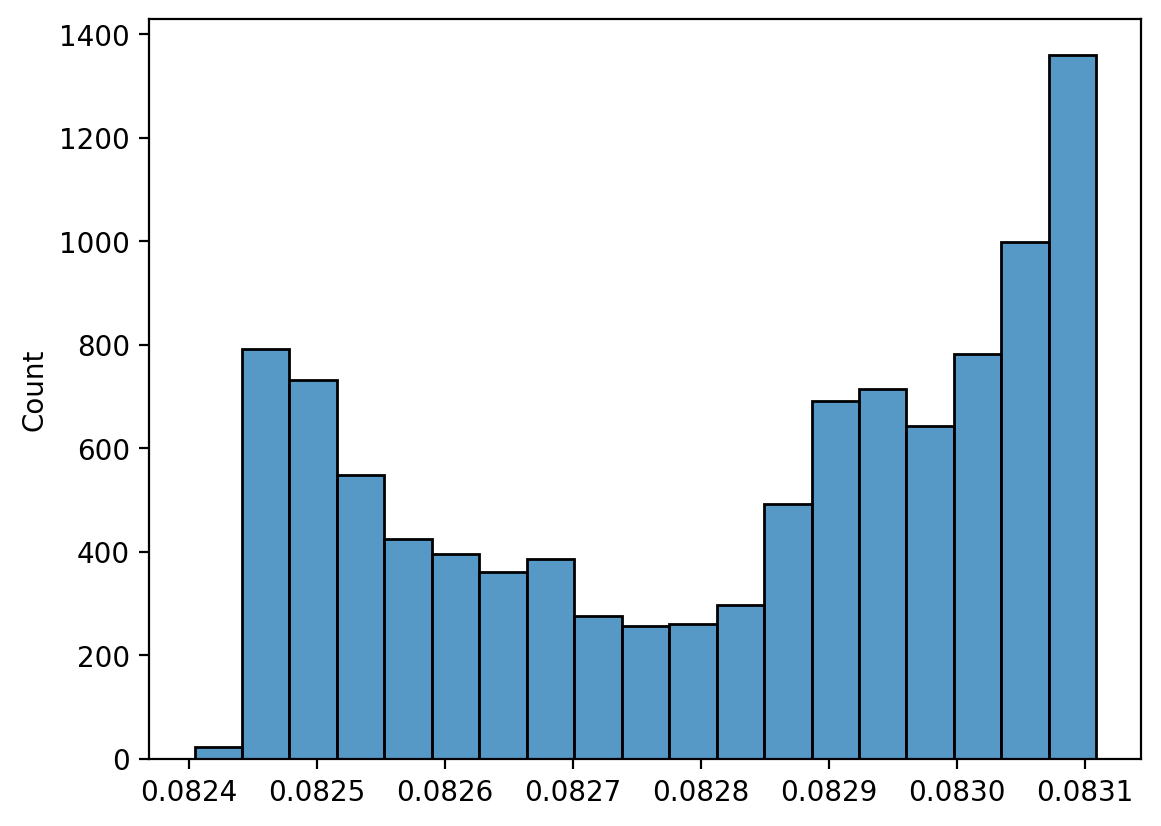

In [127]:
sns.histplot(bb[:, estimator.modulators.index('Il2$Il2rg')])
# plt.axvline(ard.coef_[estimator.modulators.index('Il15$Il2rb')], c='red')

In [126]:
pd.DataFrame(
    np.column_stack([betas.mean(0)[1:].cpu().numpy(), ard.coef_]), 
    index=estimator.modulators, columns=['SpT', 'ARD']
).sort_values('SpT', ascending=False)[:30]



SpT       ARD
Mef2c               0.347434  0.347466
Ebf1                0.285994  0.287227
Il2$Il2rg           0.082819 -0.111967
Il15$Il2rb          0.071240 -0.102392
Tnfsf13b$Tnfrsf13c  0.068489  0.069691
Mdk$Sdc4            0.061046  0.061739
C4b$Cr2             0.056561  0.065517
Ccl5$Ackr2          0.045916  0.060461
Prdm9               0.044059  0.045794
Ptn$Sdc1            0.037592  0.039139
Grn$Sort1           0.033438  0.034166
Stat2               0.031093  0.031599
Ebi3$Il27ra         0.030730  0.032749
Csf1$Csf1r          0.028059  0.035790
Ccl12$Ccr2          0.027718  0.033976
Il21$Il21r          0.027234  0.030762
Irf9                0.025435  0.026288
Sema3b$Nrp2         0.024779  0.025712
Gzma$F2r            0.024767  0.027059
Cebpb               0.024187  0.025187
Rest                0.023540  0.024880
Klf7                0.021483  0.022238
Ccl20$Ccr6          0.021268  0.024541
Sp4                 0.019429  0.020448
Cxcl12$Cxcr4        0.018056  0.029033
Gas6$Mertk          0.017207  0.017506
C3$Itgax            0.016598  0.016717
Ptn$Ncl             0.016426  0.017605
Il15$Il15ra         0.016170  0.023824
Ccl27a$Ccr2         0.011781  0.023665

array([ 0.        ,  0.0251872 , -0.03870417,  0.28722715, -0.13739534,
       -0.04604578, -0.01450244,  0.02628794,  0.02223801,  0.34746596,
       -0.01558456,  0.04579417,  0.        ,  0.02488033,  0.        ,
       -0.04294268, -0.0160398 ,  0.02044762,  0.0315992 , -0.0254028 ,
       -0.05605789, -0.0117484 ,  0.        , -0.01797512, -0.02148262,
        0.01160861, -0.01434835,  0.        ,  0.01667151, -0.04787773,
        0.        ,  0.        ,  0.        ,  0.03397621,  0.02366497,
        0.        , -0.014486  ,  0.02454097,  0.        ,  0.        ,
        0.06046119,  0.        , -0.04576382, -0.06207497,  0.        ,
        0.        ,  0.        ,  0.02903313, -0.01480891,  0.        ,
        0.00941787,  0.08625668, -0.11196717,  0.        ,  0.        ,
       -0.05927952,  0.        ,  0.02382364, -0.10239188,  0.05659318,
        0.03076164,  0.06373806,  0.        ,  0.01092697,  0.03274885,
       -0.02751954,  0.        ,  0.        ,  0.        , -0.01